In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [15]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df_corr = df.corr()
corr_target = abs(df_corr['Outcome'])
features = corr_target[corr_target >= 0.10]
features = features.keys()
features

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age',
       'Outcome'],
      dtype='object')

In [17]:
X = df[features]
X = X.drop("Outcome", axis=1)
y = df['Outcome']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
accuracys = []
recalls = []
precisions = []
f1_scores = []
errors = []
cf_matrix = []
fpers = []
tpers = []

def process(clf):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    error_rate = 1 - accuracy
    error = 1 - accuracy
    precision = confusion[0][0]/(confusion[0][0] + confusion[1][0]) * 100
    recall = confusion[0][0]/(confusion[0][0] + confusion[0][1]) * 100
    f1_score = ((2 * precision * recall) / (precision + recall)) / 100
    probs = clf.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, _ = roc_curve(y_test, probs)

    fpers.append(fper)
    tpers.append(tper)
    accuracys.append(accuracy)
    recalls.append(recall)
    errors.append(error)
    precisions.append(precision)
    f1_scores.append(f1_score)
    cf_matrix.append(confusion)

In [19]:
algo = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
#     MultinomialNB(force_alpha=True),
    SVC(gamma=0.01, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

algos = [
    "KNN",
    "Decision Tree",
#     "Naive Bayes",
    "SVM",
    "Random Forest",
    "Ada Boost",
    "Gradient Boosting",
]

for clf in algo:
    process(clf)

In [20]:
Metric = pd.DataFrame({
    'Algorithm': algos,
    "Error rate": errors,
    'Accuracy': accuracys,
    'Recall': recalls,
    'Precision': precisions,
    'F1_score': f1_scores
})

Metric

,Algorithm,Error rate,Accuracy,Recall,Precision,F1_score
0,KNN,0.331169,0.668831,69.696970,76.666667,0.730159
1,Decision Tree,0.272727,0.727273,70.707071,84.337349,0.769231
2,SVM,0.318182,0.681818,83.838384,71.551724,0.772093
3,Random Forest,0.233766,0.766234,79.797980,83.157895,0.814433
4,Ada Boost,0.272727,0.727273,79.797980,78.217822,0.790000
5,Gradient Boosting,0.253247,0.746753,77.777778,81.914894,0.797927


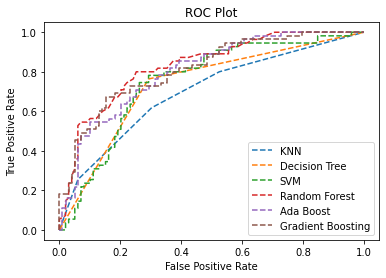

In [25]:
for i in range(len(fpers)):
    plt.plot(fpers[i], tpers[i], linestyle='--', label=algos[i])

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()